# Prostate Adenocarcinoma (PRAD)
[Jump to the urls to download the GCT and CLS files](#Downloads)

<p><strong>Authors:</strong> Alejandra Ramos, Marylu Villa, and Edwin Juarez</p>
<p><strong>Contact info:</strong> Email Edwin at ejuarez@cloud.ucsd.edu or post a question in <a href="http://www.genepattern.org/help" target="_blank">http://www.genepattern.org/help</a></p>

This notebook provides the steps to download all the PRAD samples (RNA-Seq) from The Cancer Genome Atlas (TCGA) contained in the Genomic Data Commons (GDC) Data portal. These samples can be downloaded as a GCT file and phenotype labels (primary tumor vs normal samples) can be downloaded as a CLS file. These files are compatible with other GenePattern Analyses.

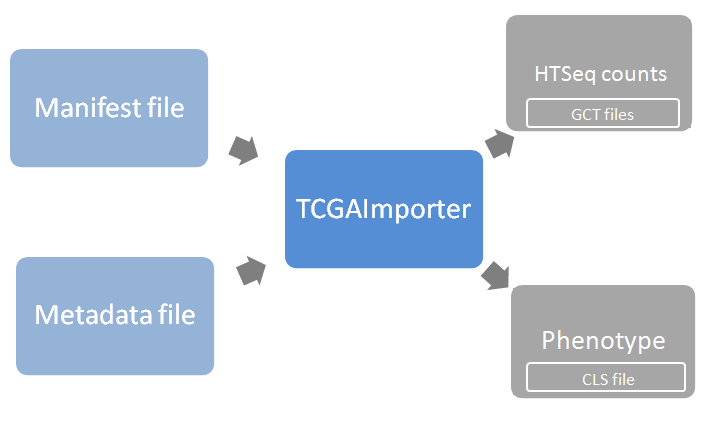

# Overview

<p>An<em> adenocarcinoma</em> is a type of cancer that arises in the cells of glands. Most cells in the prostate gland are of the glandular type, which means that adenocarcinoma is the most common type of cancer to occur in the prostate. Cancer occurs when the genes of a cell become abnormal (mutation), causing the cell to multiply and interfere with the normal function of a tissue.</p>

<p>Once the cancer reaches a certain size, the abnormal cells can spread to other parts of the body and cause cancerous tumours to grow. This phenomenon is known as metastasis. If a tumour is capable of spreading to other parts of the body in this way, it is called malignant. Adenocarcinoma of the prostate is malignant, however many types grow extremely slowly, and so are unlikely to spread before a man dies of other causes.</p>


## PRAD Statistics

<ul>
	<li>Prostate cancer is the most common cancer among men, except for skin cancer.</li>
	<li>This year, an estimated 164,690 men in the United States will be diagnosed with prostate cancer.</li>
	<li>The average age of diagnosis is 66; the disease rarely occurs before age 40. For unknown reasons, the risk of prostate cancer is 74% higher in black men than in non-Hispanic white men.</li>
</ul>


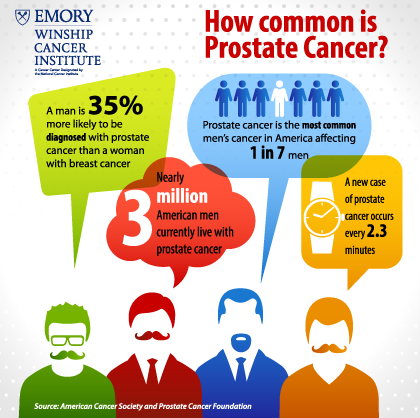

http://advancingyourhealth.org/cancer/2015/11/18/prostate-cancer-statistics-that-may-surprise-you/

## Dataset's Demographic Information

<p>TCGA contains 547 PRAD&nbsp;samples&nbsp;(495&nbsp;primary cancer samples, 52&nbsp;normal tissue samples) from 495&nbsp;people. Below is a summary of the demographic information represented in this dataset. If you are interested in viewing the complete study, as well as the files on the GDC Data Portal, you can follow&nbsp;<a href="https://portal.gdc.cancer.gov/repository?facetTab=cases&amp;filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TCGA-PRAD%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.analysis.workflow_type%22%2C%22value%22%3A%5B%22HTSeq%20-%20Counts%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.experimental_strategy%22%2C%22value%22%3A%5B%22RNA-Seq%22%5D%7D%7D%5D%7D&amp;searchTableTab=cases" target="_blank">this link (these data were gathered on July 10th, 2018).</a></p>


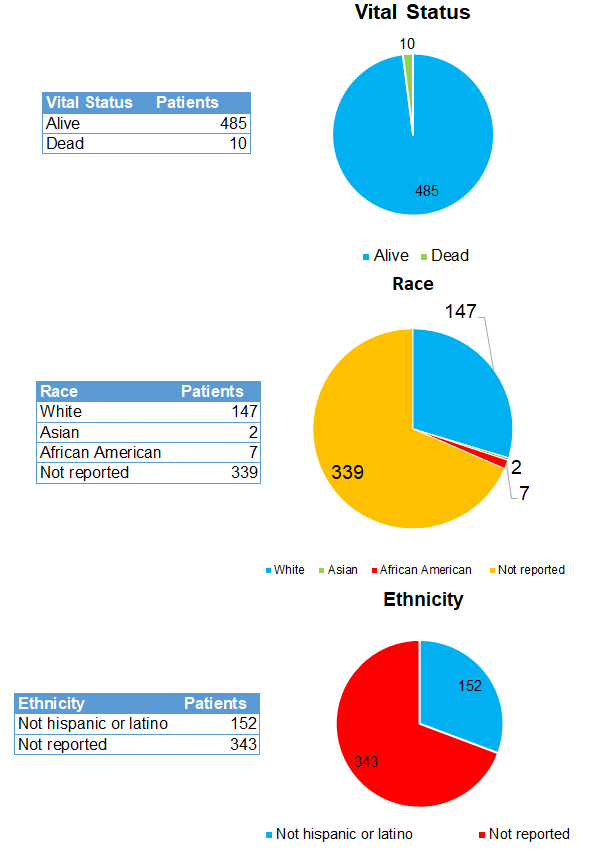

# Login to GenePattern

<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Login to the *GenePattern Cloud* server.</li>
</ol>

</div>

In [12]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

# Downloading RNA-Seq HTSeq Counts Using TCGAImporter

Use the TCGAImporter module to download RNA-Seq HTSeq counts from the GDC Data Portal using a Manifest file and a Metadata file

<p><strong>Input files</strong></p>

<ul>
	<li><em>Manifest file:</em> a file containing the list of RNA-Seq samples to be downloaded.</li>
	<li><em>Metadata file:</em> a file containing information about the files present at the GDC Data Portal. Instructions for downloading the Manifest and Metadata files can be found here: <a href="https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf" target="_blank">https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf</a></li>
</ul>

<p><strong>Output files</strong></p>

<ul>
	<li><em>PRAD_TCGA.gct</em> - This is a tab delimited file that contains the gene expression&nbsp;(HTSeq&nbsp;counts) from the samples listed on the Manifest file. For more info on GCT files, look at reference <a href="#References">1</a><em> </em></li>
	<li><em><em>PRAD_TCGA.cls</em> -</em> The CLS file defines phenotype labels (in this case Primary Tumor and Normal Sample) and associates each sample in the GCT file with a label. For more info on CLS files, look at reference <a href="#References">2</a></li>
</ul>

<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Load the manifest file in **Manifest** parameter.</li>
    <li>Load the metadata file in **Metadata** parameter.</li>
    <li>Click **run**.</li>
</ol>

</div>

<p><strong>Estimated run time for TCGAImporter</strong> : ~ 7 minutes</p>

In [15]:
tcgaimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')
tcgaimporter_job_spec = tcgaimporter_task.make_job_spec()
tcgaimporter_job_spec.set_parameter("manifest", "https://cloud.genepattern.org/gp/users/aleramos123/tmp/run3004815005786575964.tmp/PRAD_MANIFEST.txt")
tcgaimporter_job_spec.set_parameter("metadata", "https://cloud.genepattern.org/gp/users/aleramos123/tmp/run786027922474714840.tmp/PRAD_METADATA.json")
tcgaimporter_job_spec.set_parameter("output_file_name", "PRAD_TCGA")
tcgaimporter_job_spec.set_parameter("gct", "True")
tcgaimporter_job_spec.set_parameter("translate_gene_id", "True")
tcgaimporter_job_spec.set_parameter("cls", "True")
genepattern.display(tcgaimporter_task)


job35220 = gp.GPJob(genepattern.session.get(0), 35220)
genepattern.display(job35220)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')

# Downloads

<p>You can download the input and output files of TCGAImporter for this cancer type here:</p>

<p><strong>Inputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/BLCA/BLCA_MANIFEST.txt" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/PRAD/PRAD_MANIFEST.txt</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_METADATA.json" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/PRAD/PRAD_METADATA.json</a></li>
</ul>

<p><strong>Outputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.gct" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/PRAD/PRAD_TCGA.gct</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.cls" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/PRAD/PRAD_TCGA.cls</a></li>
</ul>


If you'd like to download similar files for other TCGA datasets, visit this link: 
- https://datasets.genepattern.org/?prefix=data/TCGA_HTSeq_counts/

# References

[1] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT

[2] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#CLS

<p>[3]&nbsp;<a href="https://www.myvmc.com/diseases/prostate-cancer-adenocarcinoma-of-the-prostate/#What_is" target="_blank">https://www.myvmc.com/diseases/prostate-cancer-adenocarcinoma-of-the-prostate/#What_is</a></p>

<p>[4]&nbsp;<a href="https://www.cancer.net/cancer-types/prostate-cancer/statistics" target="_blank">https://www.cancer.net/cancer-types/prostate-cancer/statistics</a></p>

<p>[5]&nbsp;<a href="http://advancingyourhealth.org/cancer/2015/11/18/prostate-cancer-statistics-that-may-surprise-you/" target="_blank">http://advancingyourhealth.org/cancer/2015/11/18/prostate-cancer-statistics-that-may-surprise-you/</a></p>
